In [1]:
library(scatterplot3d)
data <- read.csv("./Data/Rent.csv", sep=';')
data$s <- as.numeric(gsub(",", ".", data$s))

# Задание 1

In [2]:
N  <- 200
epsilon <- rnorm(N,0,1)
theta <- cbind(5,8,12)
i <- 1:N
x <- 1 + .1*i  
y <- theta[,1] + theta[,2]*x + theta[,3]*x^2 + epsilon

Параметры:
- `a = 5`
- `b = 8`
- `c = 12`

In [3]:
X <- cbind(rep(1, N), x, x^2) 
# Nreg <- lm(y~x+x^2) # Почему так не работает?
Nreg <- lm(y~X[,2]+X[,3])
summary(Nreg)


Call:
lm(formula = y ~ X[, 2] + X[, 3])

Residuals:
     Min       1Q   Median       3Q      Max 
-2.71160 -0.63455 -0.02756  0.61874  3.14306 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.718923   0.253999   18.58   <2e-16 ***
X[, 2]       8.051262   0.052569  153.16   <2e-16 ***
X[, 3]      11.998126   0.002316 5179.85   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9766 on 197 degrees of freedom
Multiple R-squared:      1,	Adjusted R-squared:      1 
F-statistic: 2.743e+08 on 2 and 197 DF,  p-value: < 2.2e-16


Все параметры оказались значимыми.<br>
Гипотеза о коррелляции принимается.<br>

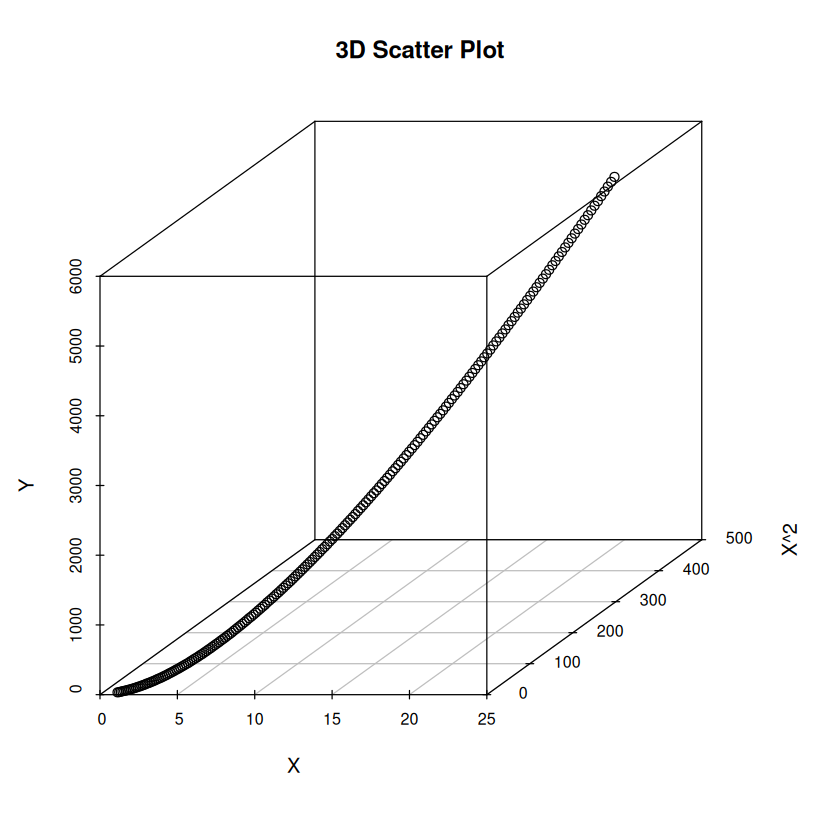

In [4]:
scatterplot3d(X[,2], X[,3], y, main = "3D Scatter Plot", xlab = "X", ylab = "X^2", zlab = "Y")

 $$ \widehat {\theta }  =  (XX^{T})^{-1}  XY. $$


In [5]:
theta_est <- solve(t(X) %*% X) %*% t(X) %*% y

In [6]:
rownames(theta_est) <- c("theta1", "theta2","theta3")
theta_est

theta1,4.718923
theta2,8.051262
theta3,11.998126


Несмещенная оценка

In [7]:
S_sqare <- (1 / (N - 3)) * t(y - X %*% theta_est) %*% (y - X %*% theta_est)
S_sqare[1]

[1] 0.9537076

Оценка дисперсии коэффицентов параметров.<br>
Ковариационная матрица.

`Разве это похоже на правду?`

In [8]:
S_square_theta <- S_sqare[1] * solve(t(X) %*% X)
S_square_theta

,,x,
,0.0645154635,-0.0121064987,4.762755e-04
x,-0.0121064987,0.0027635140,-1.185726e-04
,0.0004762755,-0.0001185726,5.365276e-06


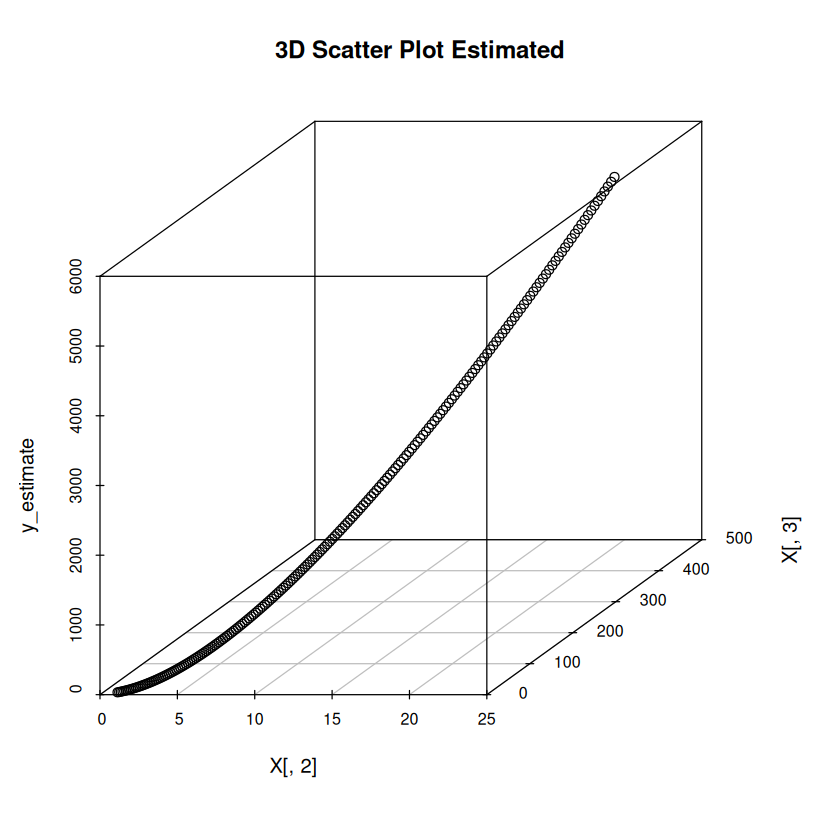

In [9]:
y_estimate <- theta_est[1] + theta_est[2]*X[,2] + theta_est[3]*X[,3]
scatterplot3d(X[,2], X[,3], y_estimate, main = "3D Scatter Plot Estimated")

Коэффент детерминации <br>
$ R^{2} = 1 - \,\frac{RSS}{TSS} $ <br>
$ RSS = \sum{(y_{i}-\hat{y}_{i})^{2}}$ <br>
$ TSS = \sum{(y_{i}-\overline{y}_{i})^{2}}$

In [10]:
RSS <- sum((y-y_estimate)^2)
TSS <- sum((y-mean(y))^2)
R_2 <- 1- RSS/TSS
RSS
TSS
R_2

[1] 187.8804

[1] 523200659

[1] 0.9999996

`t-статистика` для параметров 

In [11]:
se_theta <- sqrt(diag(S_square_theta))
t_statistic <- theta_est / se_theta
t_statistic
qt(1 - .05/2, df = N - 2)

theta1,18.57851
theta2,153.15568
theta3,5179.85244


[1] 1.972017

# Задание 2

In [13]:
data

n,rent,s,floor,rooms,walls,district
<int>,<int>,<dbl>,<int>,<int>,<int>,<int>
1,11000,36,6,1,0,1
2,11000,33,1,1,0,4
3,12000,44,3,2,0,1
4,12000,64,9,2,0,1
5,10000,20,3,1,1,2
6,8000,19,5,1,1,1
7,16000,50,5,2,1,3
8,12000,44,3,1,1,3
9,13000,43,5,2,0,4


В том виде, в котором у меня есть датасет корректно я могу построить только такую модель. 

In [15]:
reg <- lm(data$rent~data$s)
summary(reg)


Call:
lm(formula = data$rent ~ data$s)

Residuals:
    Min      1Q  Median      3Q     Max 
-5380.9 -1153.0  -137.5  1042.6  5389.5 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4715.96     459.55   10.26   <2e-16 ***
data$s        197.89      11.58   17.09   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2073 on 128 degrees of freedom
Multiple R-squared:  0.6952,	Adjusted R-squared:  0.6928 
F-statistic: 291.9 on 1 and 128 DF,  p-value: < 2.2e-16


Для дальнейшего анализа необходимо вводить dummy переменные. <br>
**Но** лабораторная с фиктивными переменными следующая.<br>
По формулировке задания я должен сделать такую модель, разве так корректно?

In [17]:
Nreg <- lm(data$rent~data$s+data$rooms+data$walls+data$floor)
summary(Nreg)


Call:
lm(formula = data$rent ~ data$s + data$rooms + data$walls + data$floor)

Residuals:
    Min      1Q  Median      3Q     Max 
-5041.6  -997.3   -29.6  1091.5  5162.8 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3945.65     643.64   6.130 1.06e-08 ***
data$s        200.73      18.99  10.568  < 2e-16 ***
data$rooms     62.02     456.03   0.136   0.8920    
data$walls    794.09     397.98   1.995   0.0482 *  
data$floor     13.48      76.55   0.176   0.8605    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2064 on 125 degrees of freedom
Multiple R-squared:  0.7046,	Adjusted R-squared:  0.6952 
F-statistic: 74.54 on 4 and 125 DF,  p-value: < 2.2e-16


Rooms и Floor оказались не значимыми. <br> Пересичтаю.

In [20]:
Nreg <- lm(data$rent~data$s+data$walls)
summary(Nreg)


Call:
lm(formula = data$rent ~ data$s + data$walls)

Residuals:
    Min      1Q  Median      3Q     Max 
-5102.6  -974.1   -35.4  1105.7  5117.6 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3998.54     578.11   6.917 2.02e-10 ***
data$s        203.36      11.77  17.279  < 2e-16 ***
data$walls    783.02     390.32   2.006    0.047 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2048 on 127 degrees of freedom
Multiple R-squared:  0.7045,	Adjusted R-squared:  0.6999 
F-statistic: 151.4 on 2 and 127 DF,  p-value: < 2.2e-16


Предположительная стоимость аренды "своей" квартиры.<br>
**Точечный прогноз.**

In [30]:

cat(Nreg$coefficients[1] + 21*Nreg$coefficients[2]+1*Nreg$coefficients[3])


9052.178

In [39]:
conf.reg <- confint(Nreg, level = .95)
conf.reg

,2.5 %,97.5 %
(Intercept),2854.56785,5142.5047
data$s,180.07406,226.6518
data$walls,10.65023,1555.3908


**Интервальный прогноз**

In [42]:
cat( conf.reg[1,1] + 21 * conf.reg[2,1] + 1 * conf.reg[3,1] , " - ", conf.reg[1,2] + 21 * conf.reg[2,2] + 1 * conf.reg[3,2] )

6646.773  -  11457.58

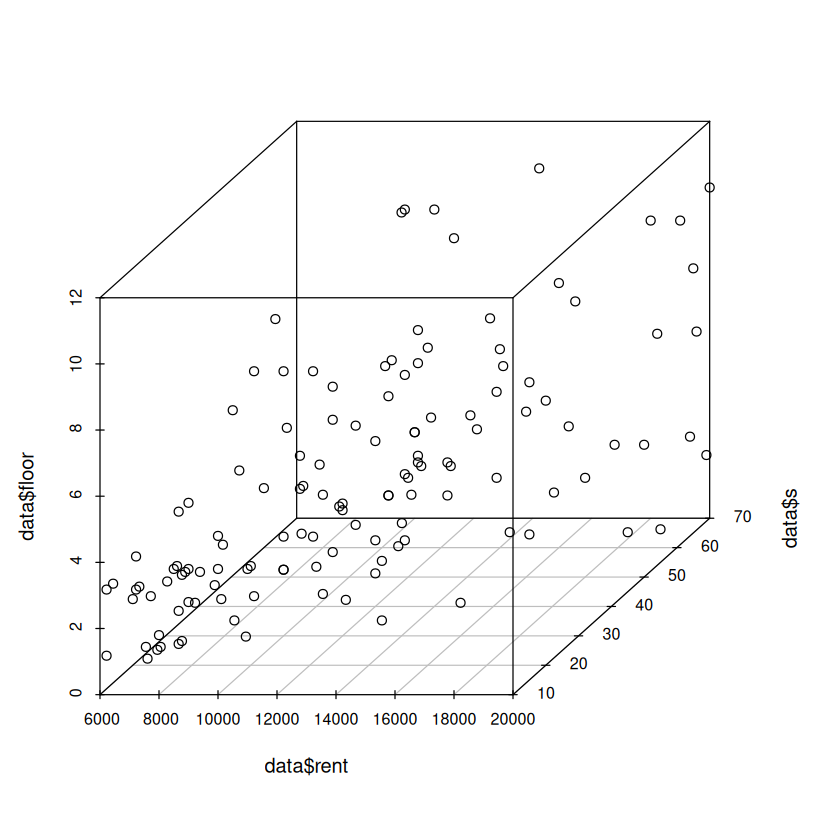

In [33]:
scatterplot3d(data$rent, data$s, data$floor)